In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from collections import Counter
test_participant = 20

In [35]:
from imblearn.over_sampling import SMOTE, ADASYN


In [41]:
data = pd.read_csv('../Collected Data/preprocessed/preprocessed_traindata.csv')

X = data.drop('Label', axis=1) #features
y = data['Label']
y = y.str.strip()
len(X)
X.tail()


,avg_accX,min_accX,max_accX,var_accX,std_accX,avg_accY,min_accY,max_accY,var_accY,std_accY,...,min_pressure,max_pressure,var_pressure,range_pressure,std_pressure,slope_pressure,kurtosis_pressure,Pressure_below_avg,Pressure_above_avg,skew_pressure
4612,-0.920286,-1.554565,-0.463623,0.051270,0.225863,0.148145,-0.246582,0.537964,0.024403,0.155824,...,974.224017,974.439454,0.002567,0.215438,0.050536,0.000640,0.640439,0.37,0.63,-1.064501
4613,-0.858254,-1.183960,-0.514893,0.026653,0.162849,0.125621,-0.135010,0.486938,0.020475,0.142732,...,974.234792,974.622938,0.004915,0.388146,0.069929,0.000298,2.124373,0.68,0.32,0.928071
4614,-0.773865,-1.334839,-0.460693,0.034093,0.184180,0.010675,-0.305542,0.178467,0.013334,0.115183,...,974.305675,974.941654,0.022076,0.635979,0.148209,0.000264,0.056936,0.51,0.49,0.609047
4615,-0.802524,-1.200439,-0.459473,0.032913,0.180966,0.056221,-0.144409,0.205200,0.008546,0.092214,...,974.589560,975.141330,0.014732,0.551770,0.121074,0.000439,0.798906,0.45,0.55,0.756359
4616,-0.065311,-1.114380,0.796143,0.460808,0.674776,0.339815,-0.041260,1.050781,0.110099,0.329831,...,974.783900,975.285295,0.017133,0.501395,0.130110,0.003139,-0.713406,0.52,0.48,0.092571


In [42]:
label_encoder = LabelEncoder()

encoded_traininglabels = label_encoder.fit_transform(y)

print("Encoded Labels:", encoded_traininglabels)

Encoded Labels: [0 0 0 ... 2 2 2]


In [43]:
label_mapping = dict(zip(encoded_traininglabels, y))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'lift down', 2: 'stairs down', 3: 'stairs up', 1: 'lift up'}


In [44]:
y = encoded_traininglabels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(sorted(Counter(y_train).items()))
print(sorted(Counter(y).items()))

[(0, 687), (1, 777), (2, 1046), (3, 1183)]
[(0, 862), (1, 972), (2, 1291), (3, 1492)]


In [46]:
Xtrain_resampled, ytrain_resampled = ADASYN().fit_resample(X_train, y_train)
print (sorted(Counter(ytrain_resampled).items())) 

X_resampled, y_resampled = ADASYN().fit_resample(X, y)
print (sorted(Counter(y_resampled).items()))

ValueError: No samples will be generated with the provided ratio settings.

In [47]:
# Define the parameter grid
param_grid = {
    'n_estimators': [200, 225, 250, 275, 300, 325, 350],  # Testing different values for n_estimators
    'max_depth': [None,5, 10, 15, 20],       # Testing different values for max_depth
}

# Initializing Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X, y)

# Get the best model and best parameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Parameters:", best_params)


Best Parameters: {'max_depth': 15, 'n_estimators': 350}


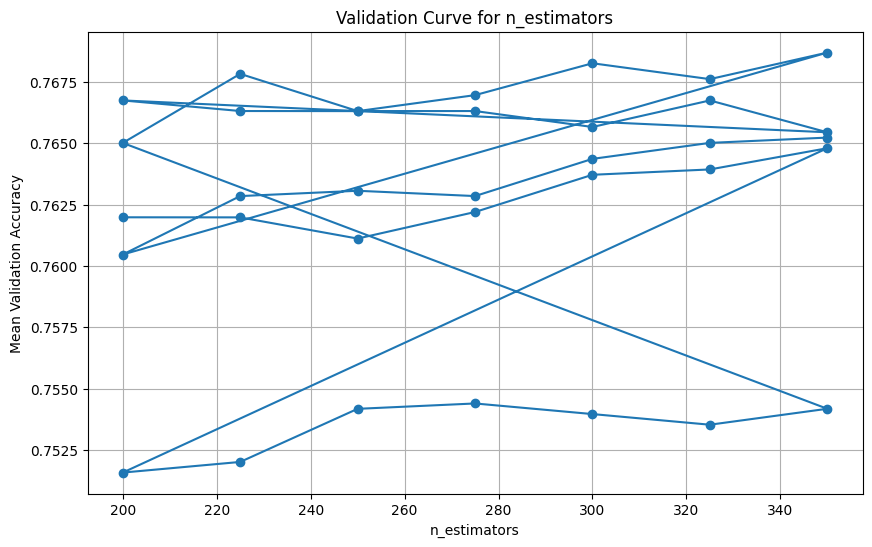

In [48]:
import matplotlib.pyplot as plt

# Extract and plot mean validation scores
mean_scores = grid_search.cv_results_['mean_test_score']
params_n_estimators = [param['n_estimators'] for param in grid_search.cv_results_['params']]

plt.figure(figsize=(10, 6))
plt.plot(params_n_estimators, mean_scores, marker='o')
plt.xlabel('n_estimators')
plt.ylabel('Mean Validation Accuracy')
plt.title('Validation Curve for n_estimators')
plt.grid(True)
plt.show()


In [59]:
# Training the model using the best parameters
final_rf = RandomForestClassifier(**best_params, random_state=42)
final_rf.fit(X,y)

RandomForestClassifier(max_depth=15, n_estimators=350, random_state=42)

In [50]:

y_pred = final_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7954545454545454


In [51]:
data = pd.read_csv('../Collected Data/preprocessed/preprocessed_testdata.csv')

xtest = data.drop('Label', axis=1) #features
ytest = data['Label']

In [52]:
encoded_testinglabels = label_encoder.fit_transform(ytest)
label_mapping = dict(zip(encoded_testinglabels, ytest))
print("Label Mapping:", label_mapping)
print(encoded_testinglabels)

Label Mapping: {0: 'lift down', 3: 'stairs up', 2: 'stairs down', 1: 'lift up'}
[0 0 0 0 0 0 0 0 0 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 2 2 2 2 2
 2 2 2 2 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [60]:
y_pred = final_rf.predict(xtest)
ytest = encoded_testinglabels
accuracy = accuracy_score(ytest, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.7229299363057324


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [62]:
import numpy as np
cm = confusion_matrix(ytest, y_pred,  labels=np.arange(len(label_encoder.classes_)))

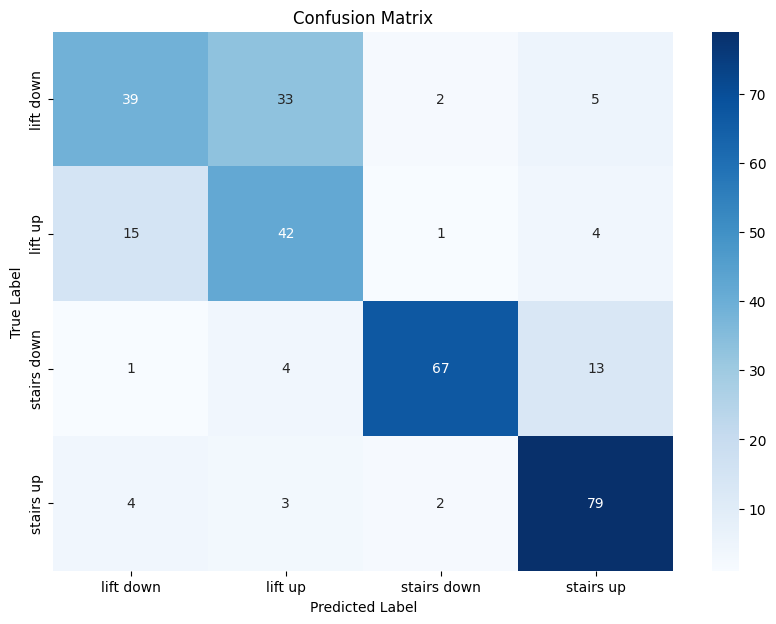

In [63]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [57]:
importances = final_rf.feature_importances_

# Create a DataFrame for better visualization
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [58]:
feature_importances

,Feature,Importance
26,slope_pressure,0.201234
19,std_magnitude,0.086091
18,var_magnitude,0.081142
17,max_magnitude,0.055309
3,var_accX,0.041606
4,std_accX,0.041197
16,min_magnitude,0.039416
1,min_accX,0.027372
9,std_accY,0.025499
13,var_accZ,0.025294
